In [94]:
"""1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. """

#importamos libreriras

import pandas as pd # manejo de analisis estrucuras de datos
import numpy as np # calculos numericos y analisis de datos
import seaborn as sns # crea graficas estadisticas
import matplotlib.pyplot as plt #crea graficas en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#leemos el dataset
Dataset = pd.read_csv("./Titanic-Dataset.csv")
Dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
"""2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. """
#datos en 0
print("Cantidad de Registros con cero en Edad: ",Dataset['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Dataset['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Dataset['Fare'].isin([0]).sum())
#print(Dataset.isnull().any())
#print((Dataset == '').any())
#eliminamos_datos_vacios = Dataset[(Dataset != '').all(axis=1)]

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Fare:  15


Text(0.5, 1.0, 'Pclass')

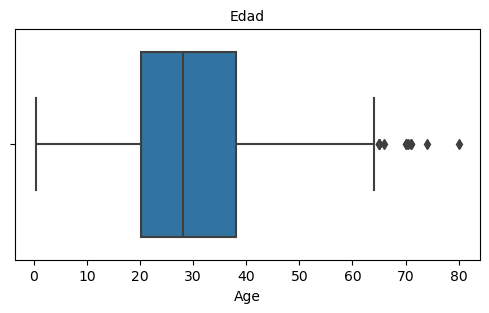

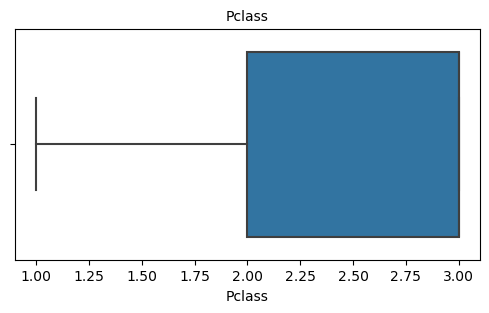

In [96]:
#revisar datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Age'])
plt.title('Edad', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Pclass'])
plt.title('Pclass', fontsize=10)


In [97]:
nivel_minimo=1
nivel_maximo=80
Total_Atipicos=((Dataset['Age']<nivel_minimo) | (Dataset['Age']>nivel_maximo)).sum()
print("El total de datos atipicos de Edad {}".format(Total_Atipicos))

nivel_minimo=1
nivel_maximo=400
Total_Atipicos=((Dataset['Pclass']<nivel_minimo) | (Dataset['Pclass']>nivel_maximo)).sum()
print("El total de datos atipicos de Pclass {}".format(Total_Atipicos))

El total de datos atipicos de Edad 7
El total de datos atipicos de Pclass 0


In [100]:
#filtramos datos atipicos par cambiarlos.
nivel_minimo=1
nivel_maximo=80
Dataset=Dataset[(Dataset['Age']<nivel_maximo)&(Dataset['Age']>nivel_minimo)]

In [101]:
#verificamos los datos atipicos
nivel_minimo=1
nivel_maximo=80
Total_Atipicos=((Dataset['Age']<nivel_minimo) | (Dataset['Age']>nivel_maximo)).sum()
print("El total de datos atipicos de Edad {}".format(Total_Atipicos))


El total de datos atipicos de Edad 0


In [103]:
"""
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
"""
#total de sobrevivientes
Dataset["Survived"].value_counts()

Survived
0    422
1    277
Name: count, dtype: int64

In [104]:
"""4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. """

#porcetaje de train 75%, porcentaje test 25%
X = Dataset.drop("Survived",axis=1) # Se cargan Los datos de train sin los datos de la columna de sobrevivientes
Y = Dataset["Survived"] # Se cargan los datos de train con Los datos de La columna de sobrevivientes

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [105]:
print(X_train)

     PassengerId  Pclass                           Name     Sex   Age  SibSp  \
491          492       3            Windelov, Mr. Einar    male  21.0      0   
823          824       3             Moor, Mrs. (Beila)  female  27.0      0   
881          882       3             Markun, Mr. Johann    male  33.0      0   
213          214       2    Givard, Mr. Hans Kristensen    male  30.0      0   
641          642       1           Sagesser, Mlle. Emma  female  24.0      0   
..           ...     ...                            ...     ...   ...    ...   
725          726       3            Oreskovic, Mr. Luka    male  20.0      0   
62            63       1    Harris, Mr. Henry Birkhardt    male  45.0      1   
777          778       3  Emanuel, Miss. Virginia Ethel  female   5.0      0   
721          722       3      Jensen, Mr. Svend Lauritz    male  17.0      1   
265          266       2              Reeves, Mr. David    male  36.0      0   

     Parch            Ticket     Fare C

In [106]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  699 non-null    int64  
 1   Survived     699 non-null    int64  
 2   Pclass       699 non-null    int64  
 3   Name         699 non-null    object 
 4   Sex          699 non-null    object 
 5   Age          699 non-null    float64
 6   SibSp        699 non-null    int64  
 7   Parch        699 non-null    int64  
 8   Ticket       699 non-null    object 
 9   Fare         699 non-null    float64
 10  Cabin        182 non-null    object 
 11  Embarked     697 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.0+ KB


In [114]:
Dataset = pd.DataFrame(Dataset)
Dataset = Dataset.drop(['Name', 'Sex', 'Ticket','Cabin','Embarked'], axis=1)

In [116]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  699 non-null    int64  
 1   Survived     699 non-null    int64  
 2   Pclass       699 non-null    int64  
 3   Age          699 non-null    float64
 4   SibSp        699 non-null    int64  
 5   Parch        699 non-null    int64  
 6   Fare         699 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 43.7 KB


In [117]:
"""
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
"""
#total de personas con problemas cardiacos
Dataset["Survived"].value_counts()

Survived
0    422
1    277
Name: count, dtype: int64

In [118]:
"""
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
"""
#porcetaje de train 75%, porcentaje test 25%
X = Dataset.drop("Survived",axis=1) # Se cargan Los datos de train sin los datos de la columna Survived
Y = Dataset["Survived"] # Se cargan los datos de train con Los datos de La columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [119]:
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
491          492       3  21.0      0      0   7.2500
823          824       3  27.0      0      1  12.4750
881          882       3  33.0      0      0   7.8958
213          214       2  30.0      0      0  13.0000
641          642       1  24.0      0      0  69.3000
..           ...     ...   ...    ...    ...      ...
725          726       3  20.0      0      0   8.6625
62            63       1  45.0      1      0  83.4750
777          778       3   5.0      0      0  12.4750
721          722       3  17.0      1      0   7.0542
265          266       2  36.0      0      0  10.5000

[524 rows x 6 columns]


In [120]:
print(Y_train)

491    0
823    1
881    0
213    0
641    1
      ..
725    0
62     0
777    1
721    0
265    0
Name: Survived, Length: 524, dtype: int64


In [121]:
"""
5. Entrenar el modelo configurando los diferentes hiperparámetros
"""

modelo_regresion = LogisticRegression(solver = "liblinear") # Liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La funcion predict predice los valores a partir del conjunto de datos de validación

In [122]:
print(Y_train)

491    0
823    1
881    0
213    0
641    1
      ..
725    0
62     0
777    1
721    0
265    0
Name: Survived, Length: 524, dtype: int64


In [123]:
print(Prediccion)

[1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


In [124]:
"""
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
"""
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       106
           1       0.67      0.57      0.61        69

    accuracy                           0.72       175
   macro avg       0.71      0.69      0.70       175
weighted avg       0.72      0.72      0.71       175



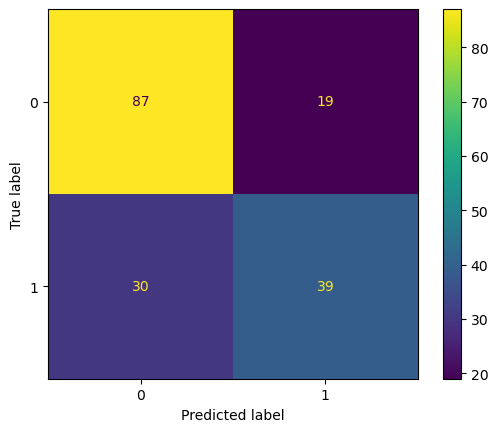

In [125]:
"""
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
"""
#matrix de confusion
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

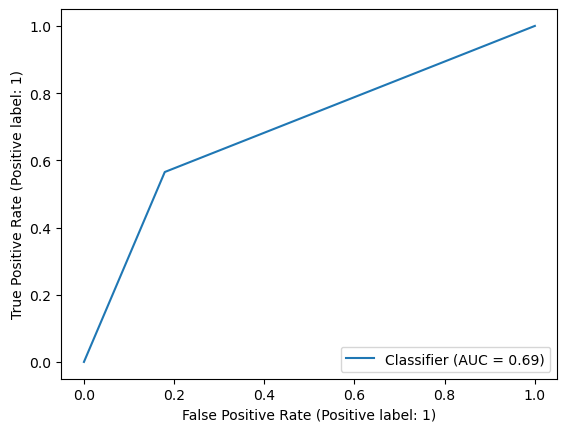

In [126]:
#curva de presicion
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()